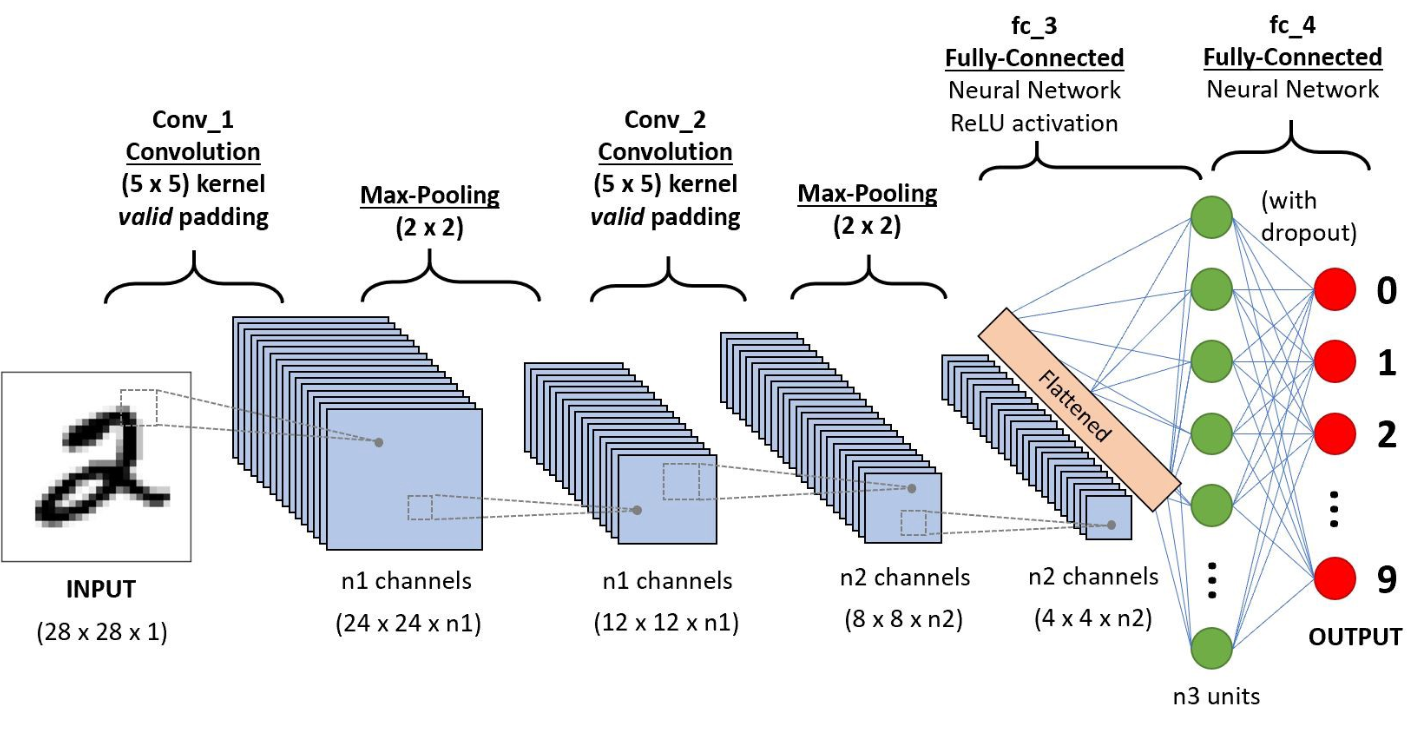

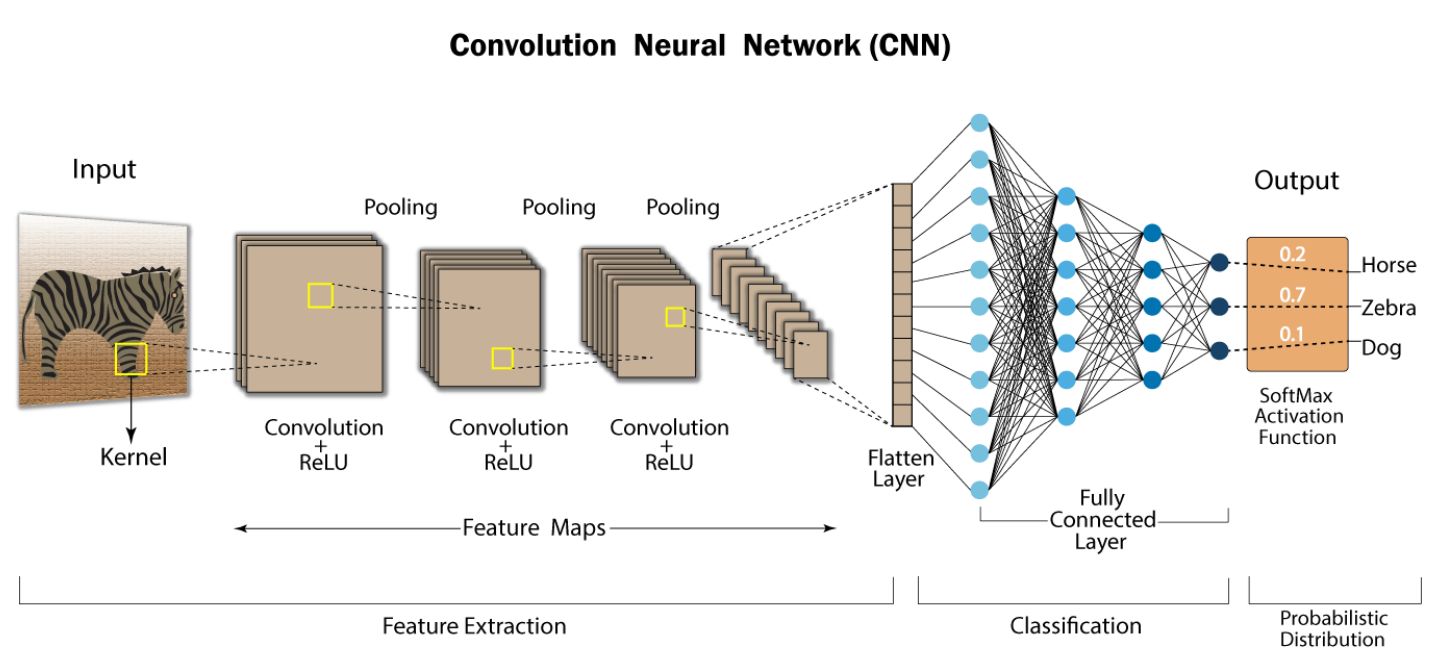

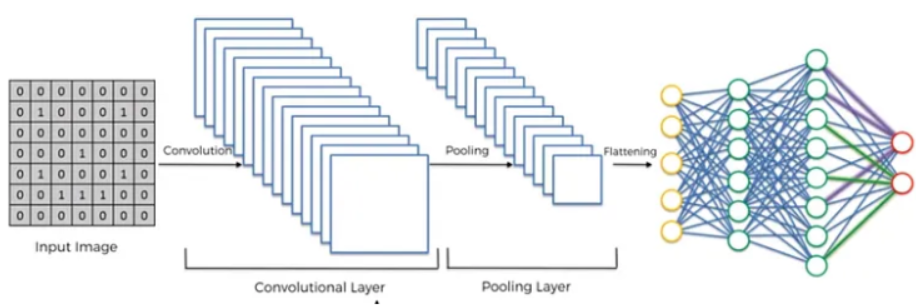

<h3><b>Convolutional Neural Network - Image Classifier (10 Classes) </b></h3>

In [28]:
import matplotlib.pyplot as plt

from keras import datasets
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import Activation
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 16s 0us/step


In [6]:
print(train_images)
print(train_labels)

train_images = train_images / 255.0
test_images = test_images / 255.0

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

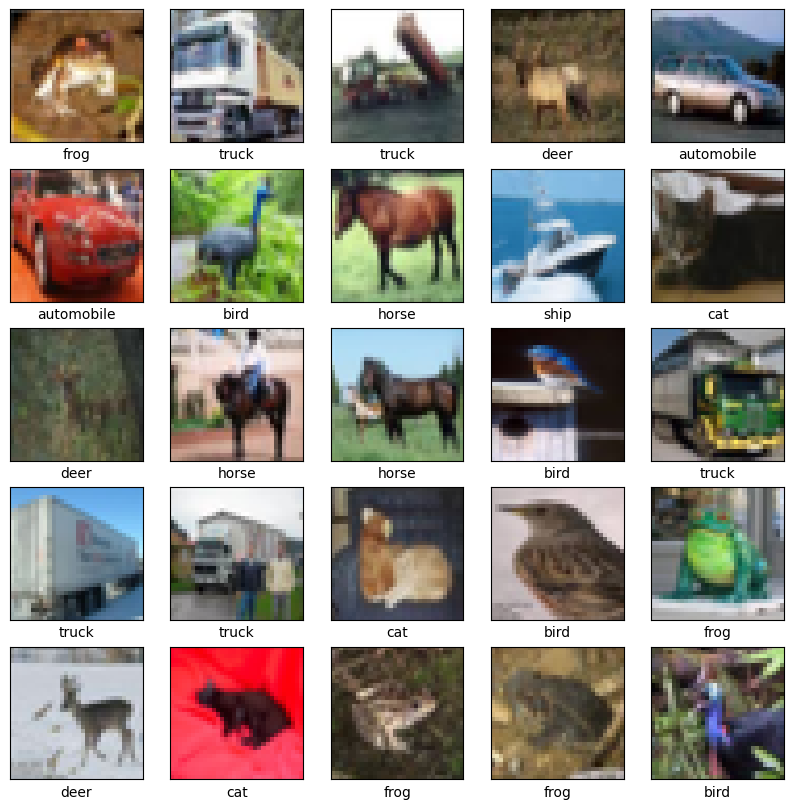

In [25]:
class_names = [
    'airplane', 'automobile', 'bird', 'cat',
    'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [27]:
cnn_model = Sequential()
cnn_model.add(Convolution2D(
    filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3)
))
cnn_model.add(Activation(activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Convolution2D(
    filters=64, kernel_size=(3, 3)
))
cnn_model.add(Activation(activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Convolution2D(
    filters=64, kernel_size=(3, 3)
))
cnn_model.add(Activation(activation='relu'))

cnn_model.add(Flatten())
cnn_model.add(Dense(64))
cnn_model.add(Activation(activation='relu'))
cnn_model.add(Dense(10))

cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 activation_11 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 activation_12 (Activation)  (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                 

In [29]:
cnn_model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = cnn_model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1563/1563 [==============================] - 27s 16ms/step - loss: 1.5266 - accuracy: 0.4395 - val_loss: 1.2738 - val_accuracy: 0.5505
Epoch 2/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.1745 - accuracy: 0.5852 - val_loss: 1.0817 - val_accuracy: 0.6136
Epoch 3/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0261 - accuracy: 0.6382 - val_loss: 1.0150 - val_accuracy: 0.6441
Epoch 4/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.9296 - accuracy: 0.6751 - val_loss: 0.9780 - val_accuracy: 0.6606
Epoch 5/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.8625 - accuracy: 0.6979 - val_loss: 0.9184 - val_accuracy: 0.6766
Epoch 6/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.7985 - accuracy: 0.7190 - val_loss: 0.8588 - val_accuracy: 0.6990
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7578 - accuracy: 0.7344 - val_loss: 0.8906 -

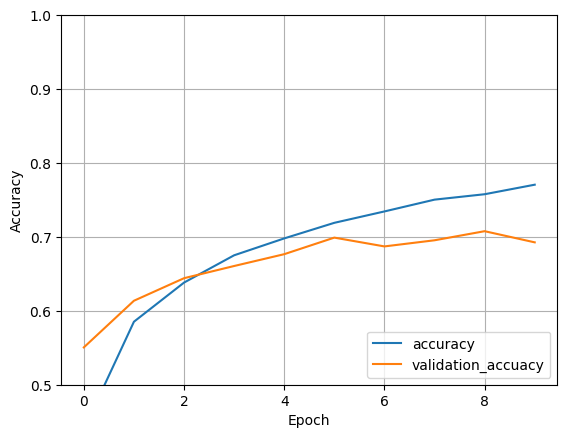

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuacy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [34]:
test_loss, test_accuracy = cnn_model.evaluate(
    test_images, test_labels, verbose=2
)


print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 - 2s - loss: 0.9259 - accuracy: 0.6926 - 2s/epoch - 5ms/step
Test loss: 0.9259331226348877
Test accuracy: 0.6926000118255615
